## Preprocessing

In [1]:
# Importing pandas and ggplot
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
sns.set(font_scale=1.5)

# Open the csv file
data = pd.read_csv("../data/NERDS.csv")


# Convert Date string to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y %H:%M")

In [2]:
data.head()

,Date,Name,Text
0,2015-04-11 23:22:00,Grace,dayum
1,2015-04-11 23:53:00,‪+65 8555 0251‬,Free d mana!
2,2015-04-11 23:53:00,‪+65 8555 0251‬,?
3,2015-04-11 23:59:00,Grace,di ben and jerry's!
4,2015-04-12 00:10:00,‪+65 8555 0251‬,<Media omitted>


## Total Chats

In [3]:
data.shape

(39586, 3)

**39,586** since 11/4/2015

## Total Media Shared (Videos, Pictures, etc)

In [4]:
data['Text'][data['Text'] == '<Media omitted>'].shape

(1111,)

**1111** media shared

# 10 Most Active Members
Calculated based on how many times a person speaks

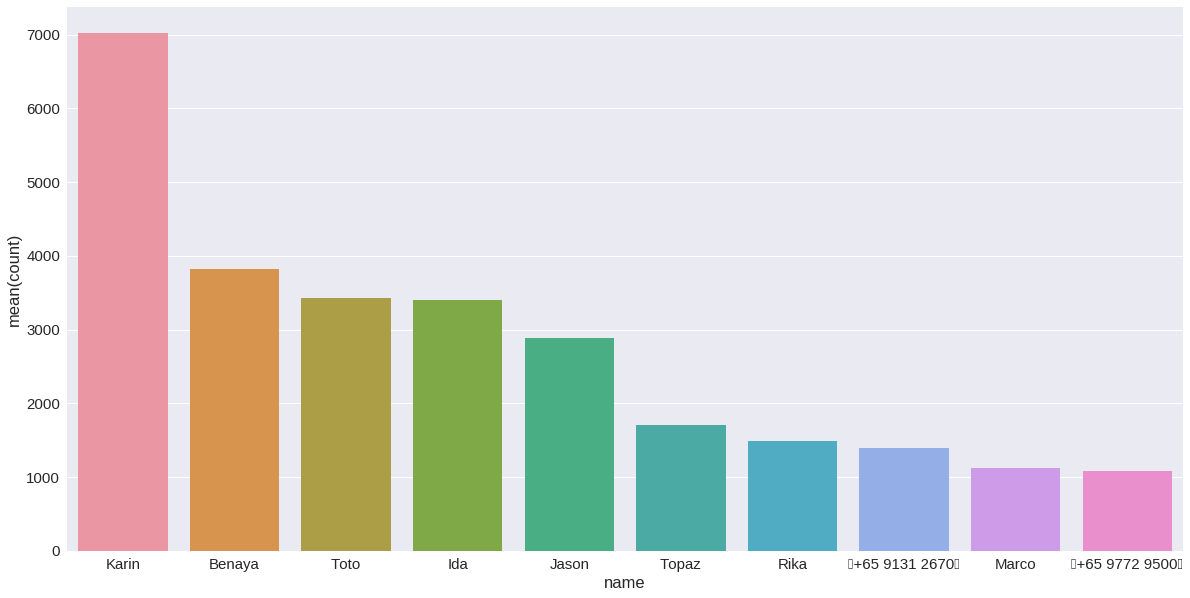

In [5]:
active_members = data['Name'].value_counts()

df = pd.DataFrame({'name': active_members.index[0:10], 'count': active_members.values[0:10]})

plot = sns.barplot(x="name", y="count", data=df)
plot.figure.set_size_inches(20,10)

# 10 Most Inactive Members
Idem

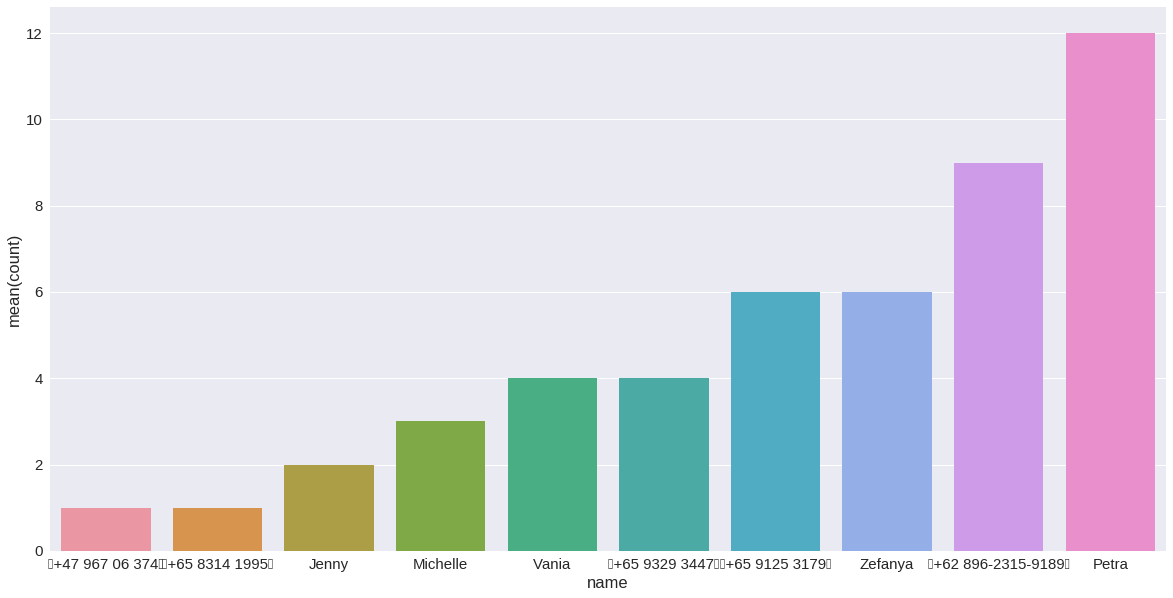

In [6]:
inactive_members = data['Name'].value_counts(ascending=True)

df = pd.DataFrame({'name': inactive_members.index[0:10], 'count': inactive_members.values[0:10]})

plot = sns.barplot(x="name", y="count", data=df)
plot.figure.set_size_inches(20,10)

# 10 Members with the Highest Number of Words Written
Calculated based the number of words written by a person

In [7]:
def count_words(text):
    words = text.split(" ")          
    return len(words)

# WA does not capture media (video etc) in its text file. 
# Instead, all the media shared is replaced by <Media ommited>
# We have to clean it for fairness sake

data_words = data[data['Text'] != '<Media omitted>']

data_words['Text'].apply(str)
data_words['No_of_words'] = data_words['Text'].apply(count_words)

/home/max/project/whatsapp-analyzer/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
data_words.head()

,Date,Name,Text,No_of_words
0,2015-04-11 23:22:00,Grace,dayum,1
1,2015-04-11 23:53:00,‪+65 8555 0251‬,Free d mana!,3
2,2015-04-11 23:53:00,‪+65 8555 0251‬,?,1
3,2015-04-11 23:59:00,Grace,di ben and jerry's!,4
5,2015-04-12 00:10:00,‪+65 8555 0251‬,Yg ambil maths ma cs jawabannya apa?,7


In [9]:
df = pd.DataFrame()
df['Name'] = data_words['Name'].unique()

def sum_words(name):
    count = data_words['No_of_words'][data_words['Name'] == name].sum()
    return count

df['Total words'] = df['Name'].apply(sum_words)

df = df.sort_values('Total words', ascending=False)

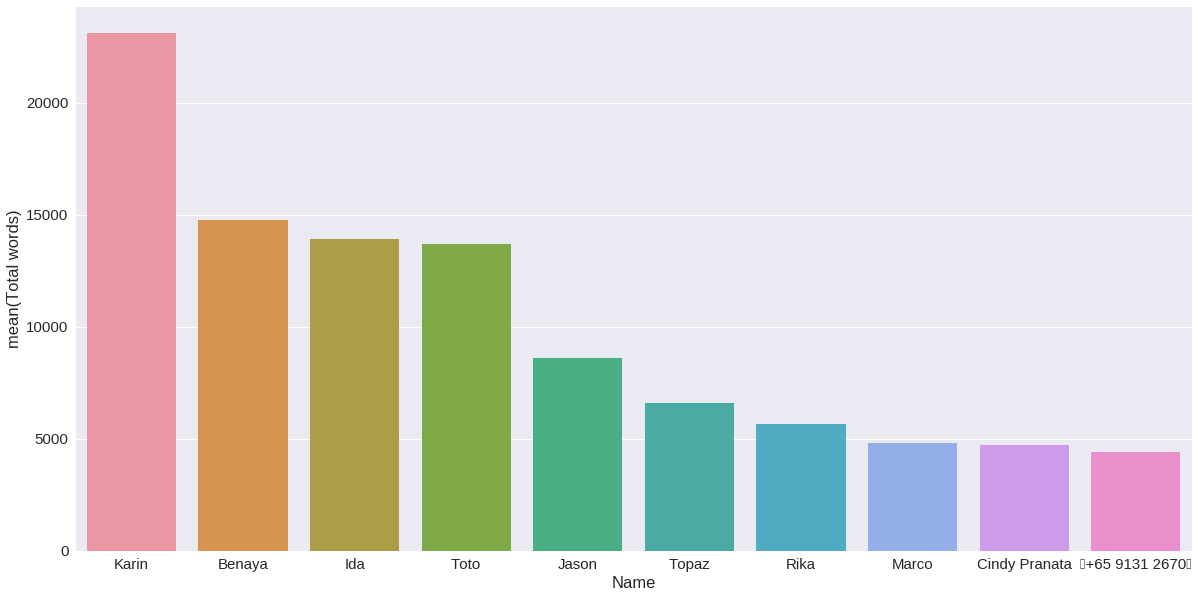

In [10]:
plot = sns.barplot(x="Name", y="Total words", data=df[0:10])
plot.figure.set_size_inches(20,10)

# 10 Members with the Highest Number of Words per Chats

In [11]:
active_members = data['Name'].value_counts()
def count_average(name):
    words = df['Total words'][df['Name'] == name].sum()
    total = active_members[name]
    return words/total

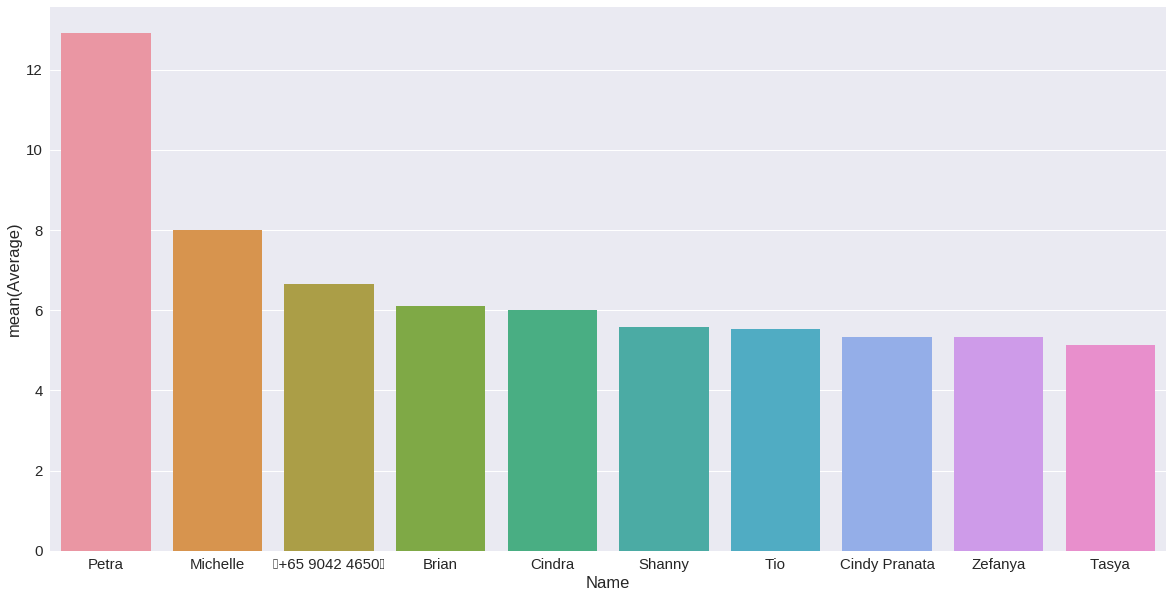

In [12]:
df['Average'] = df['Name'].apply(count_average)
df = df.sort_values('Average', ascending=False)
plot = sns.barplot(x="Name", y="Average", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Favourite Word (No Threshold)

In [13]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=15, max_df=1.0)


vect.fit(data_words['Text'])

text_dtm = vect.transform(data_words['Text'])
text_dtm

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

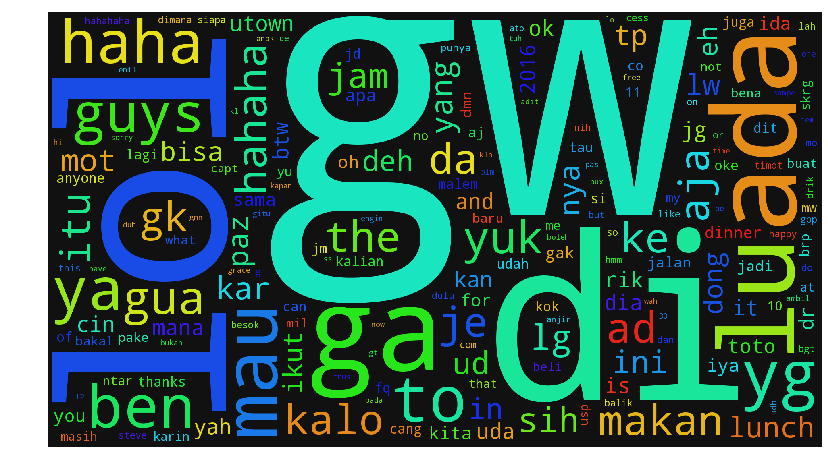

In [14]:
wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# **NOT MEANINGFUL**

# Favourite Word 2.0 (Max Threshold = 1000)

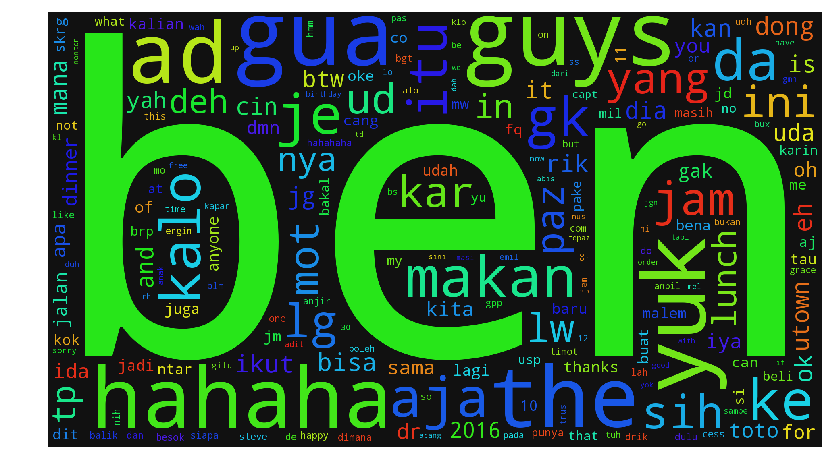

In [15]:
vect = CountVectorizer(min_df=15, max_df=1000)
text_dtm = vect.fit_transform(data_words['Text'])
word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Favourite Word 3.0 (Max Threshold=100)

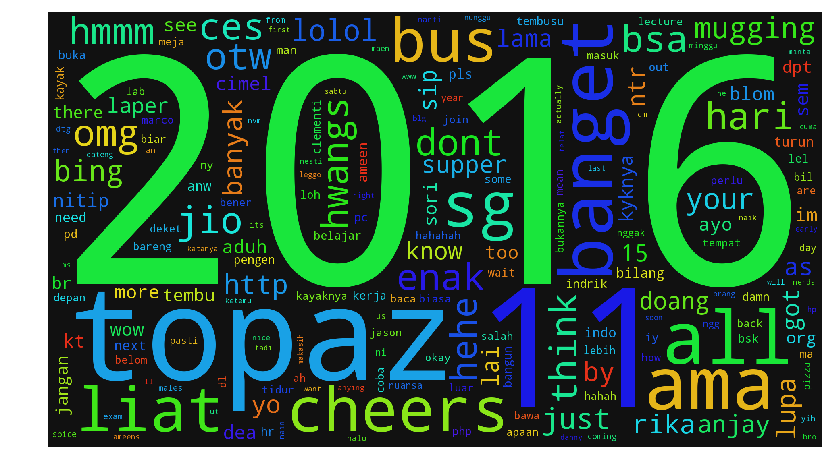

In [16]:
vect = CountVectorizer(min_df=15, max_df=100)
text_dtm = vect.fit_transform(data_words['Text'])
word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Number of Chats over Time

In [17]:
data['Short Date'] = data['Date'].apply(lambda x:x.date().strftime('%m/%Y'))
data['Short Date'] = pd.to_datetime(data['Short Date'], format="%m/%Y")

data['date_int'] = data['Short Date'].astype(np.int64)

date_count = data['date_int'].value_counts()
df = pd.DataFrame({'date':date_count.index, 'count':date_count.values})

df['real_date'] = df['date'].apply(lambda x: data['Short Date'][data['date_int'] == x].values[0])
df = df.sort_values('real_date')
df['real_date'] = df['real_date'].dt.strftime('%b/%y')


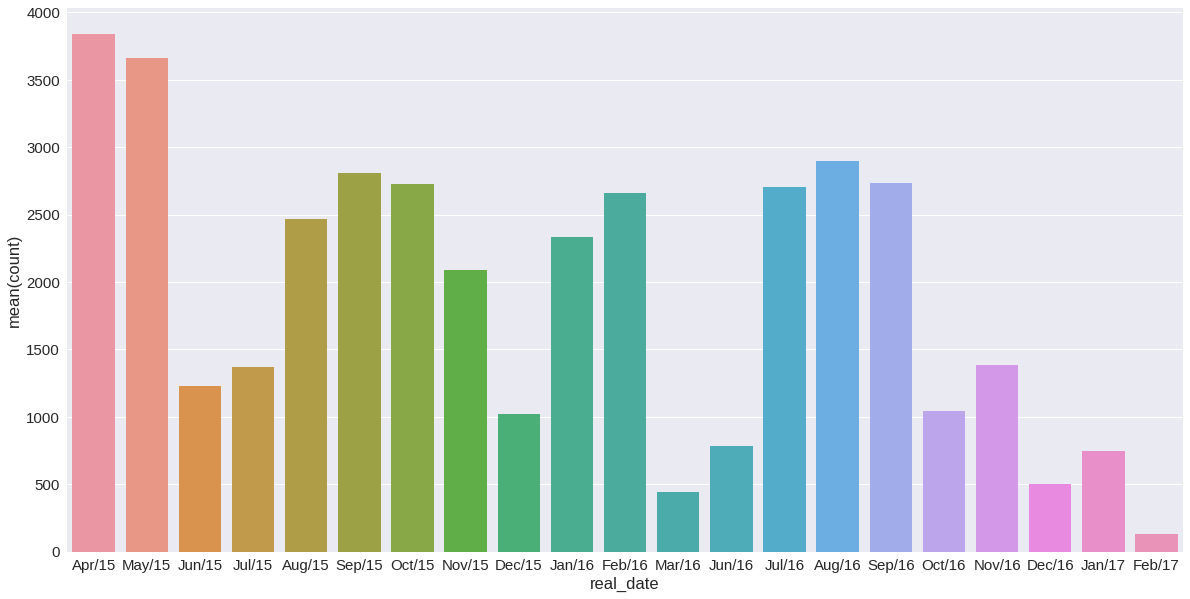

In [18]:
plot = sns.barplot(x="real_date", y="count", data=df)
plot.figure.set_size_inches(20,10)

# PEAK HOUR

In [19]:
data['Short Time'] = data['Date'].apply(lambda x:x.time().strftime('%H'))
data['Short Time'] = pd.to_datetime(data['Short Time'], format="%H")

data['time_int'] = data['Short Time'].astype(np.int64)

date_count = data['time_int'].value_counts()
df = pd.DataFrame({'time':date_count.index, 'count':date_count.values})

df['real_date'] = df['time'].apply(lambda x: data['Short Time'][data['time_int'] == x].values[0])
df = df.sort_values('real_date')
df['real_date'] = df['real_date'].dt.strftime('%H')

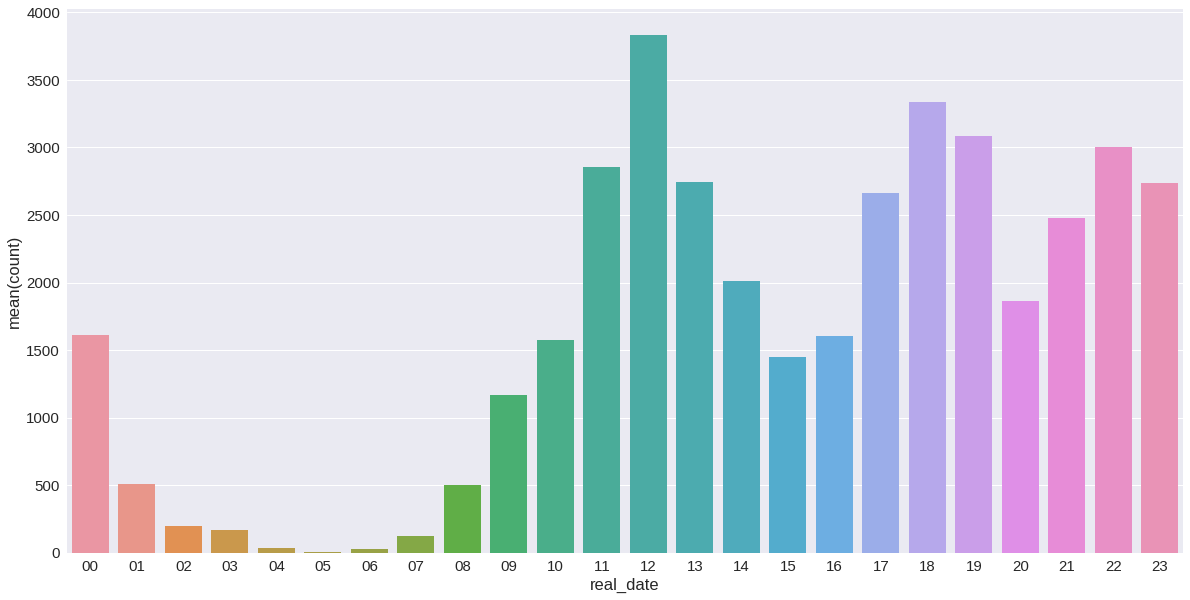

In [20]:
plot = sns.barplot(x="real_date", y="count", data=df)
plot.figure.set_size_inches(20,10)

## Peak around lunch and dinner and supper time